**NOTES**
* Error with Elastic net (no param updates).
* ANOVA F-value and $\chi^2$ selection performs identical.

In [1]:
import numpy as np
import pandas as pd
import statistics as stat

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from operator import itemgetter

%matplotlib inline

In [26]:
def plot_train_test(results, axis):

    test = results['test_score']
    train = results['train_score']
    test_std = np.sqrt(results['test_score_variance'])
    train_std = np.sqrt(results['train_score_variance'])

    # Repeated experiments.
    x_coords = np.arange(np.size(test))

    axis.plot(
        x_coords, 
        train, 
        color='blue', marker='o', markersize=5, 
        label=f"Training score"
    )
    axis.plot(
        x_coords, 
        test, 
        color='green', linestyle='--', marker='s', 
        label=f"Validation score"
    )
    axis.fill_between(
        x_coords, 
        train - train_std, 
        train + train_std, 
        alpha=0.15, color='blue'
    )
    axis.fill_between(
        x_coords, 
        test - test_std, 
        test + test_std, 
        alpha=0.15, color='green'
    )
    return axis

# Data 

In [21]:
orig_results = pd.read_csv(
    './../../data_source/results/original_images/all_features_original_images.csv',
    index_col=0
)
#rs_results = pd.read_csv(
#    './../../data_source/results/removed_broken_slices/all_features_removed_broken_slices.csv',
#    index_col=0
#)

In [22]:
#list(np.unique(orig_results['experiment_id'].values))

# PLSR

In [23]:
#list(np.unique(orig_results['experiment_id'].values))

In [24]:
selector_name = 'ANOVAFvalueSelection'
estimator_name = 'PLSREstimator'
anova_plsr_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']

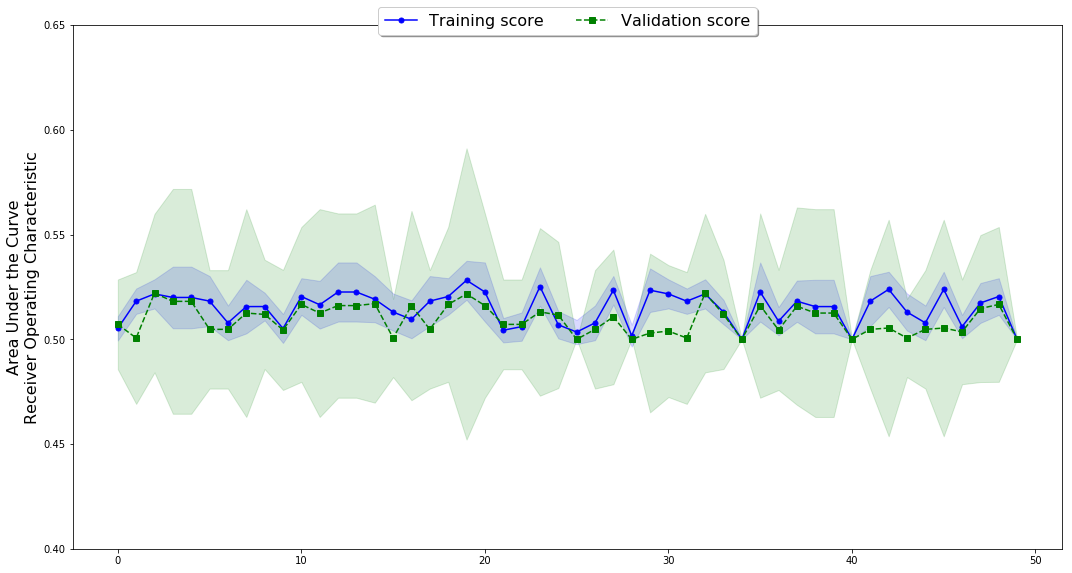

In [49]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 8), sharex=True)

plot_train_test(anova_plsr_results, axis)

plt.ylim([0.40, 0.65])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [46]:
#anova_plsr_results.filter(regex=estimator_name)

# Elastic Net

In [71]:
selector_name = 'ANOVAFvalueSelection'
estimator_name = 'ElasticNetEstimator'
anova_elnet_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']
# Failed parameter updates.
np.var(anova_elnet_results.filter(regex=estimator_name)['ElasticNetEstimator__l1_ratio']) == 0.0

# Fisher Scoring & Decision Tree

In [39]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'DTreeEstimator'
fisher_dtree_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']

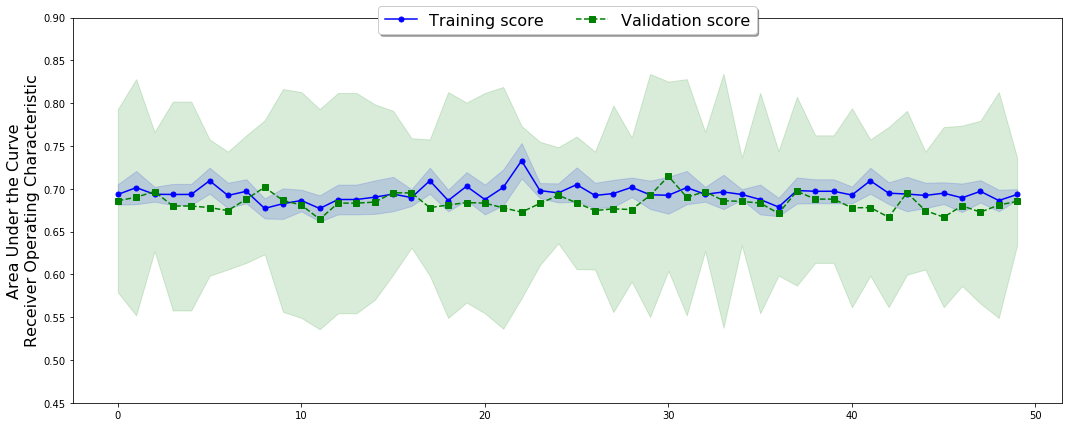

In [69]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_dtree_results, axis)

plt.ylim([0.45, 0.9])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [34]:
# Fisher Dtree:
# * citerion = gini
# * max_depth = 20
# * max_features = nan/auto
# * min_samples_leaf = 0.19527122573716446

for var_label in list(orig_fisher_dtree_results.filter(regex=estimator_name).columns):
    var = np.copy(orig_fisher_dtree_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'entropy': 27, 'gini': 23})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({10.0: 17, 5.0: 12, -1.0: 11, 20.0: 10})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({nan: 21, 'auto': 14, 'sqrt': 8, 'log2': 7})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.1842641025939807: 4, 0.15014587717491065: 3, 0.21506975285579147: 3, 0.1906181197373968: 3, 0.19264656249437012: 3, 0.18910386433210927: 2, 0.20240277940744614: 2, 0.23642732488219576: 2, 0.20846589959838266: 2, 0.215324512055506: 2, 0.18895547991717968: 2, 0.2073378328625105: 1, 0.23005643766099804: 1, 0.24959228264113506: 1, 0.2341269777831189: 1, 0.1322983837401

# ANOVA /$\chi^2$Selection & DTreeEstimator

In [59]:
selector_name = 'ANOVAFvalueSelection' 
estimator_name = 'DTreeEstimator'
anova_dtree_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']

selector_name = 'ChiSquareSelection' 
estimator_name = 'DTreeEstimator'
chi2_dtree_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']

print(np.sum(anova_dtree_results['test_score'].values == chi2_dtree_results['test_score'].values))
print(len(anova_dtree_results['test_score']))

50
50


In [105]:
sum(anova_dtree_results['ANOVAFvalueSelection__num_features'].values == chi2_dtree_results['ChiSquareSelection__num_features'].values)

50

# ChiSquareSelection & DTreeEstimator

In [78]:
selector_name = 'ChiSquareSelection' 
estimator_name = 'DTreeEstimator'
chi2_dtree_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']

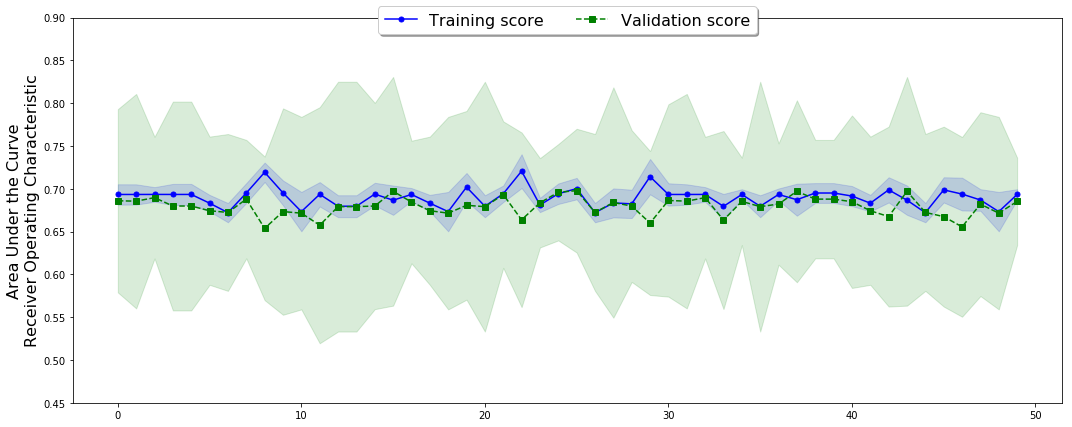

In [79]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(chi2_dtree_results, axis)

plt.ylim([0.45, 0.9])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [80]:
# Chi2 Dtree:
# * citerion = gini
# * max_depth = None
# * max_features = nan/log2
# * min_samples_leaf = 0.2116200596379749

for var_label in list(chi2_dtree_results.filter(regex=estimator_name).columns):
    var = np.copy(chi2_dtree_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({'gini': 30, 'entropy': 20})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({-1.0: 18, 20.0: 12, 5.0: 10, 10.0: 10})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({nan: 18, 'log2': 16, 'sqrt': 12, 'auto': 4})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({0.23334446075501666: 4, 0.2466825527676008: 3, 0.2292957793448553: 3, 0.1993534874579797: 3, 0.2200377181871598: 3, 0.24988787820559005: 2, 0.2223376308371873: 2, 0.2498003662258468: 2, 0.21840885772807747: 2, 0.24534651444559136: 2, 0.1931301651215277: 2, 0.2079987004327281: 1, 0.12111493416958155: 1, 0.1637062107723611: 1, 0.21577079010123426: 1, 0.162952124126043

# Random Forest

In [65]:
# Is forest, or dtree?
selector_name = 'FisherScoreSelection' 
estimator_name = 'RFEstimator'
fisher_rf_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']

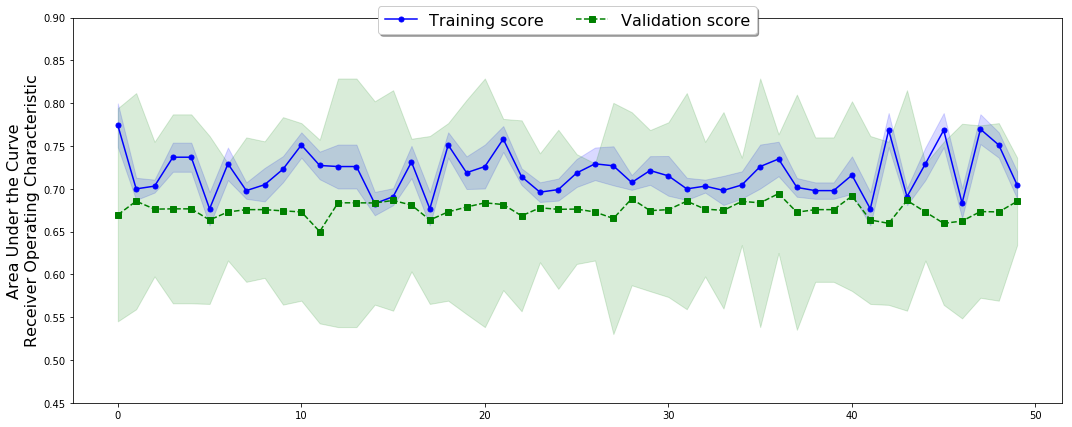

In [82]:
fig, axis = plt.subplots(nrows=1, figsize=(15, 6), sharex=True)

plot_train_test(fisher_rf_results, axis)

plt.ylim([0.45, 0.9])
plt.ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)

plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.05),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()

In [84]:
for var_label in list(fisher_rf_results.filter(regex=estimator_name).columns):
    var = np.copy(fisher_rf_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

criterion
------------------------------------------------------------
Counter({nan: 50})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({-1.0: 50})
------------------------------------------------------------


max_features
------------------------------------------------------------
Counter({nan: 50})
------------------------------------------------------------


min_samples_leaf
------------------------------------------------------------
Counter({-1.0: 50})
------------------------------------------------------------




In [89]:
#fisher_rf_results.filter(regex=estimator_name)

# Fisher XGBoost & $\chi^2$ LightGBM

In [88]:
selector_name = 'FisherScoreSelection' 
estimator_name = 'XGBoost'
fisher_xbg_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']

selector_name = 'ChiSquareSelection' 
estimator_name = 'LightGBM'
chi2_gbm_results = orig_results[orig_results['experiment_id'] == f'{selector_name}_{estimator_name}']

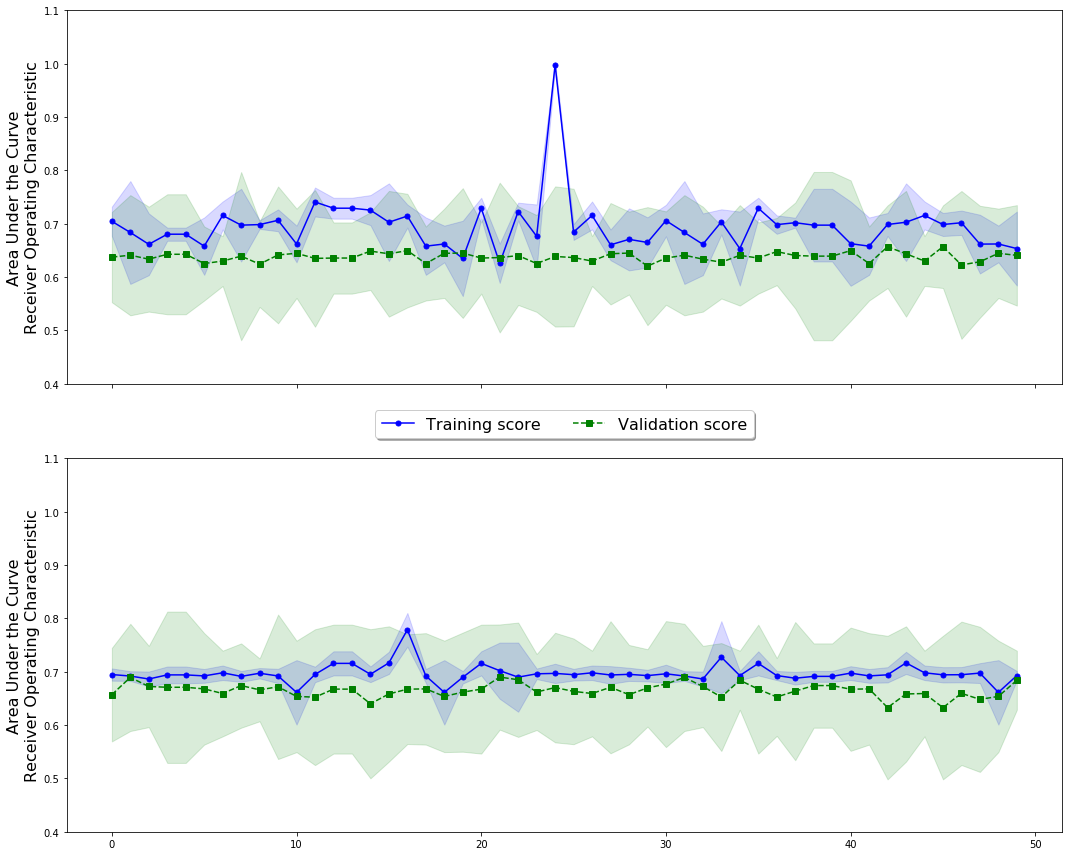

In [99]:
fig, axes = plt.subplots(nrows=2, figsize=(15, 12), sharex=True)

plot_train_test(fisher_xbg_results, axes[0])
plot_train_test(chi2_gbm_results, axes[1])

for axis in axes.ravel():
    axis.set_ylabel('Area Under the Curve\nReceiver Operating Characteristic', fontsize=16)
    axis.set_ylim([0.4, 1.1])

axes[1].legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),
    ncol=2,
    fontsize=16,
    title_fontsize=16,
    fancybox=True,
    shadow=True
)
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)

In [100]:
for var_label in list(fisher_xbg_results.filter(regex=estimator_name).columns):
    var = np.copy(fisher_xbg_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

learning_rate
------------------------------------------------------------
Counter({-1.0: 50})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({-1.0: 50})
------------------------------------------------------------


min_data_in_leaf
------------------------------------------------------------
Counter({-1.0: 50})
------------------------------------------------------------


n_estimators
------------------------------------------------------------
Counter({-1.0: 50})
------------------------------------------------------------


reg_alpha
------------------------------------------------------------
Counter({-1.0: 50})
------------------------------------------------------------


reg_lambda
------------------------------------------------------------
Counter({-1.0: 50})
------------------------------------------------------------




In [101]:
for var_label in list(chi2_gbm_results.filter(regex=estimator_name).columns):
    var = np.copy(chi2_gbm_results[f'{var_label}'])
    try:
        var[np.where(np.isnan(var))] = -1
    except:
        pass
    print(var_label.split('__')[1])
    print('-' * 60)
    print(Counter(var))
    print('-' * 60)
    print('\n')

learning_rate
------------------------------------------------------------
Counter({2.2501749891614007: 4, 3.4081171587076136: 3, 1.1000417449447129: 3, 0.584269171484054: 3, 33.671798969960754: 3, 1.3762843402966571: 2, 10.70950328261732: 2, 0.6860047660390419: 2, 6.303453306649781: 2, 2.2391720772403185: 2, 6.038457678407448: 2, 0.8861879256260118: 1, 2.7134255660409146: 1, 0.10095758043020804: 1, 20.977229471754786: 1, 24.03257864938702: 1, 1.6835488908898766: 1, 0.6193488907262094: 1, 21.497238027131814: 1, 10.066621979282: 1, 11.279959986227071: 1, 10.839668987586133: 1, 0.030147192331906793: 1, 4.685177678539947: 1, 4.670705177383128: 1, 42.98652807775253: 1, 2.386160855073552: 1, 13.072897451748275: 1, 1.5427947350719329: 1, 5.96066617913603: 1, 6.640186248239548: 1, 1.5989128295402184: 1, 6.643400840208372: 1})
------------------------------------------------------------


max_depth
------------------------------------------------------------
Counter({46.0: 4, 26.0: 3, 28.0: 3,